In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [2]:
df = pd.read_csv('athlete_events.csv', index_col='ID')

df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Columns

1. Name - Athlete's name
2. Sex - M or F
3. Age - Integer
4. Height - In centimeters
5. Weight - In kilograms
6. Team - Team name
7. NOC - National Olympic Committee 3-letter code
8. Games - Year and season
9. Year - Integer
10. Season - Summer or Winter
11. City - Host city
12. Sport - Sport
13. Event - Event
14. Medal - Gold, Silver, Bronze, or NA

## Key Questions

- **What is the distribution of medals by country over the years?**

  This question helps identify the most successful countries in the Olympic Games.

- **How has the participation of women in the Olympic Games evolved over the years?**

  An analysis of the change in female participation can reveal important trends in gender equality in sports.

- **What is the relationship between the height and weight of athletes by sport?**

  This could provide insights into common physical characteristics of athletes in different disciplines.

- **How does the age of medalists vary across different sports and events?**

  This question helps understand in which sports athletes tend to achieve success at different ages.

- **How has the distribution of sports in the Olympic Games changed over time?**

  Identifying trends in the inclusion of new sports or the elimination of others could be relevant for planning future Games.

- **Are there significant differences in the number of medals won by male and female athletes?**

  An analysis of this type could help highlight advances or disparities in competition by gender.

- **Which countries have emerged in recent Olympic Games in terms of medals won?**

  Identifying countries with significant improvements could be useful for understanding global trends in sports.

- **What is the success rate (medals won) of athletes based on the number of Olympic Games they have participated in?**

  This could provide insight into the experience and longevity in the careers of successful athletes.


In [3]:
df.shape

(271116, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [5]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
numeric_columns = df.select_dtypes(include=np.number)

for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df.Medal = df.Medal.fillna('No Medal')

In [8]:
df.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [9]:
df.duplicated().sum()

1385

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().round()

,Age,Height,Weight,Year
count,269731.0,269731.0,269731.0,269731.0
mean,25.0,175.0,71.0,1979.0
std,6.0,9.0,13.0,30.0
min,10.0,127.0,25.0,1896.0
25%,22.0,170.0,63.0,1960.0
50%,25.0,175.0,71.0,1988.0
75%,28.0,180.0,76.0,2002.0
max,97.0,226.0,214.0,2016.0


## General Summary of Categorical Variables


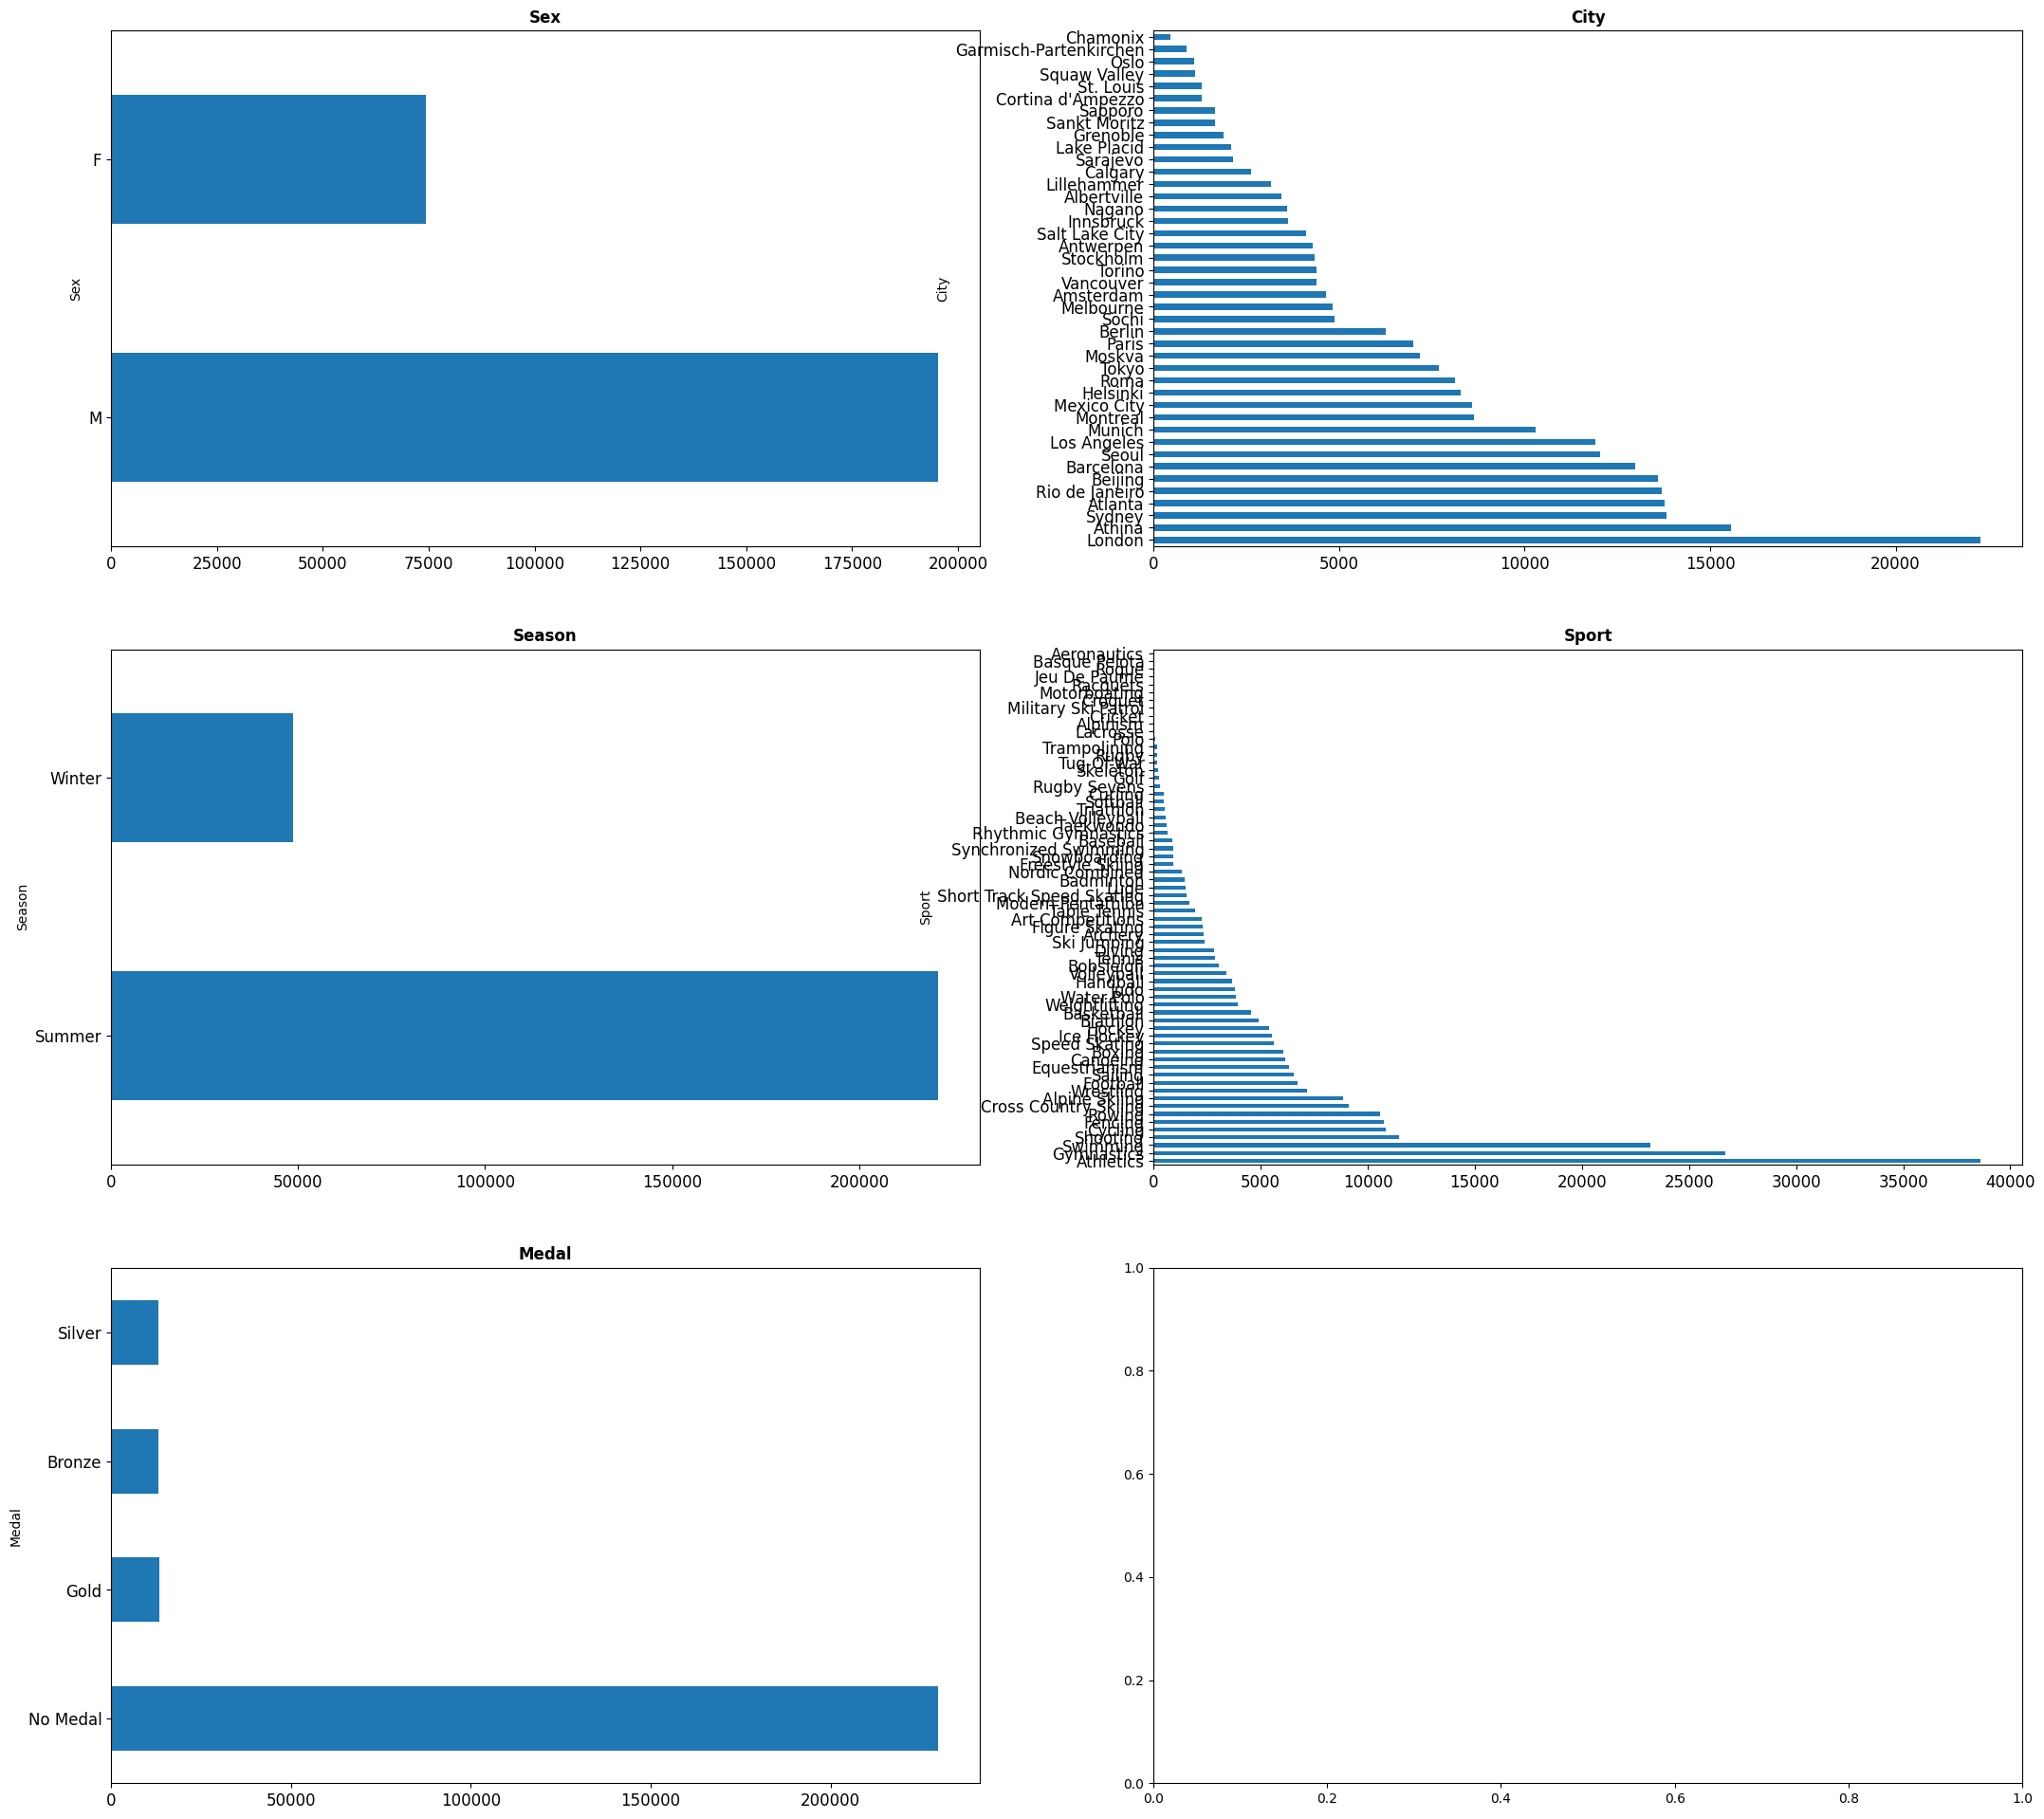

In [36]:
def graficos_eda_categoricos(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (26, filas * 8))

    # Flatten to iterate through the plot as if it were 1-dimensional instead of 2
    ax = ax.flat 

    # Create the loop that adds plots
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O').loc[:,['Sex','City', 'Season', 'Sport', 'Medal']])


In [14]:
text_columns = df.select_dtypes('object').columns
text_columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

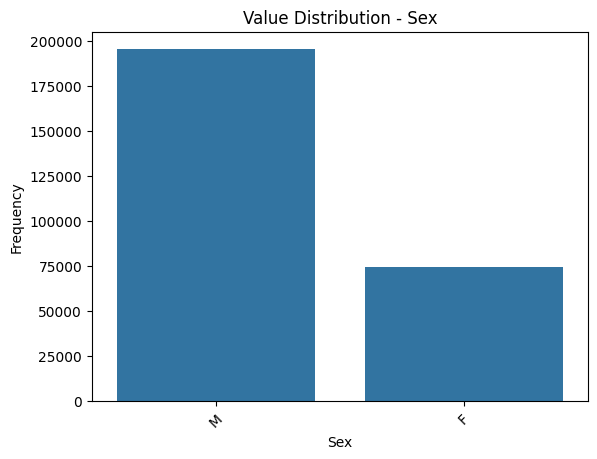

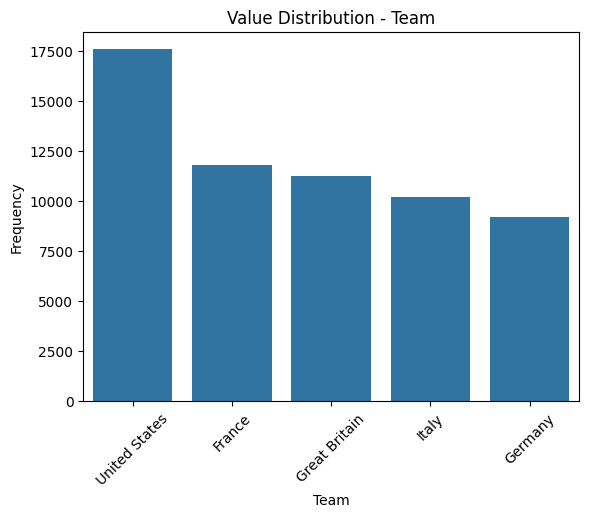

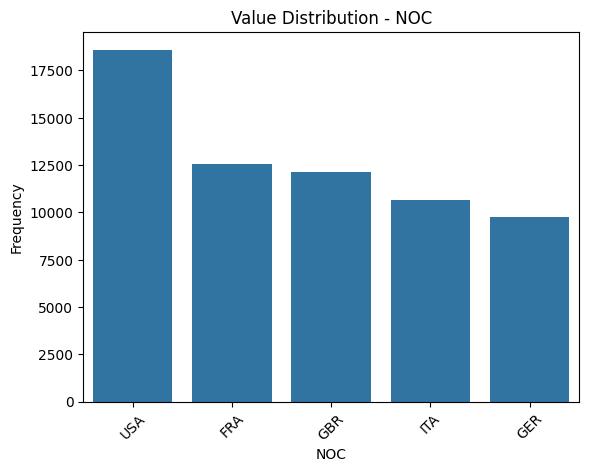

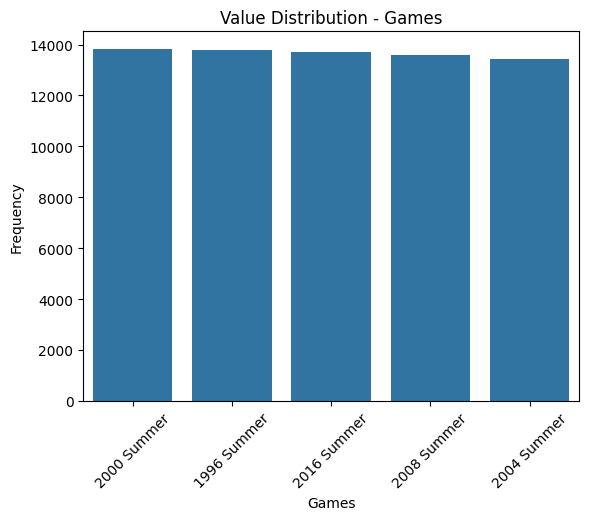

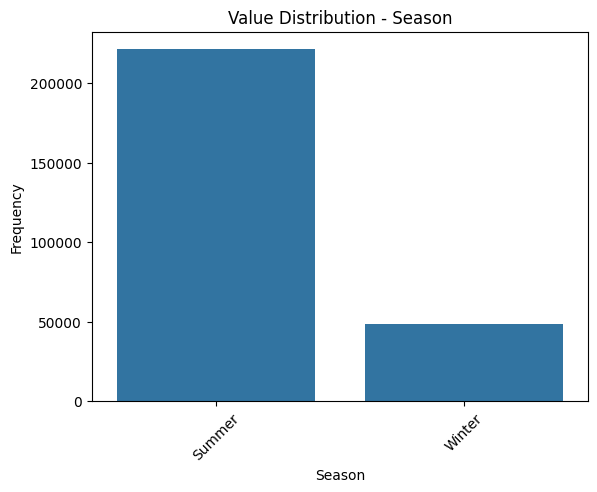

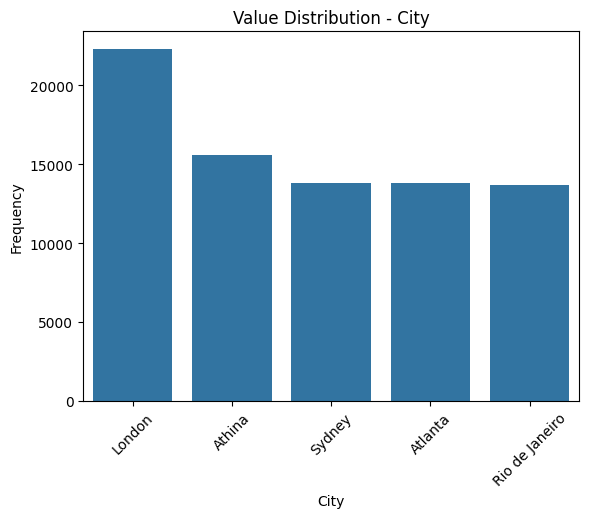

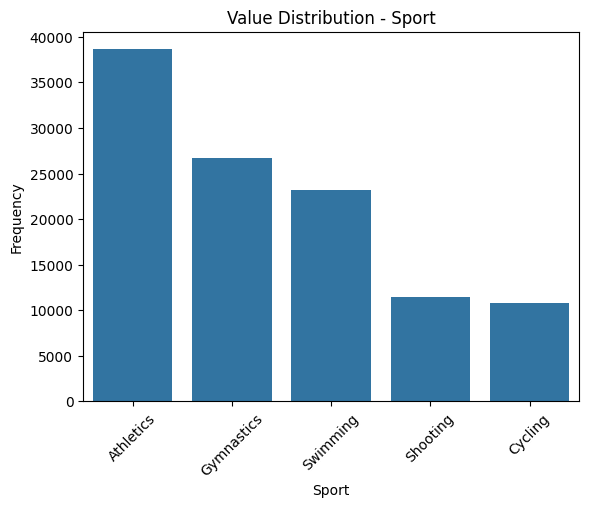

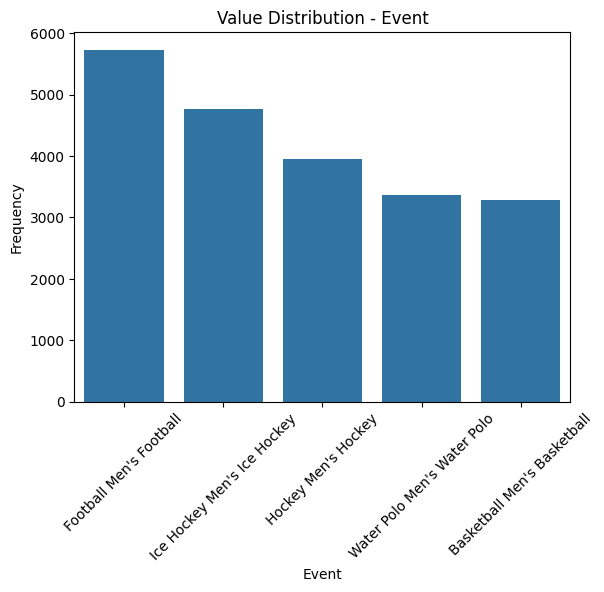

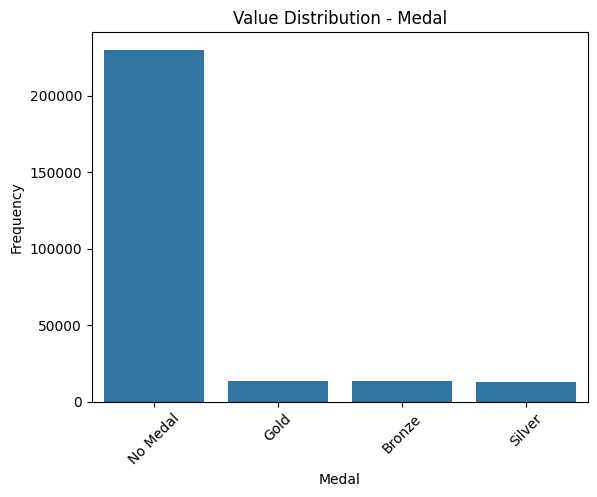

In [37]:
for column in text_columns:
  if(column != 'Name'):
    a = df[column].value_counts().head()
    sns.barplot(x=a.index, y=a.values)
    plt.title(f"Value Distribution - {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation= 45)
    plt.show()

    

## Resumen general de las varibales numéricas

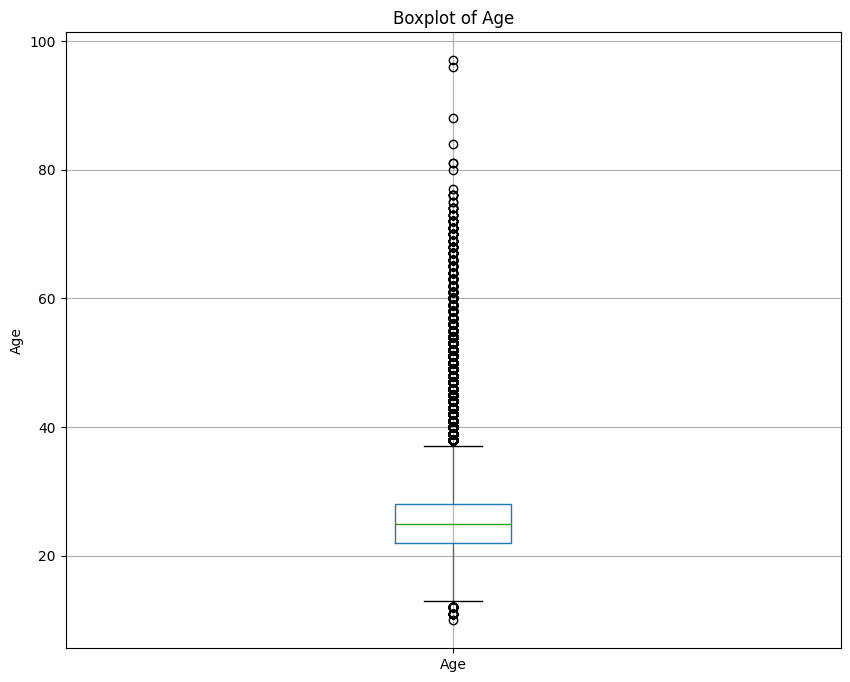

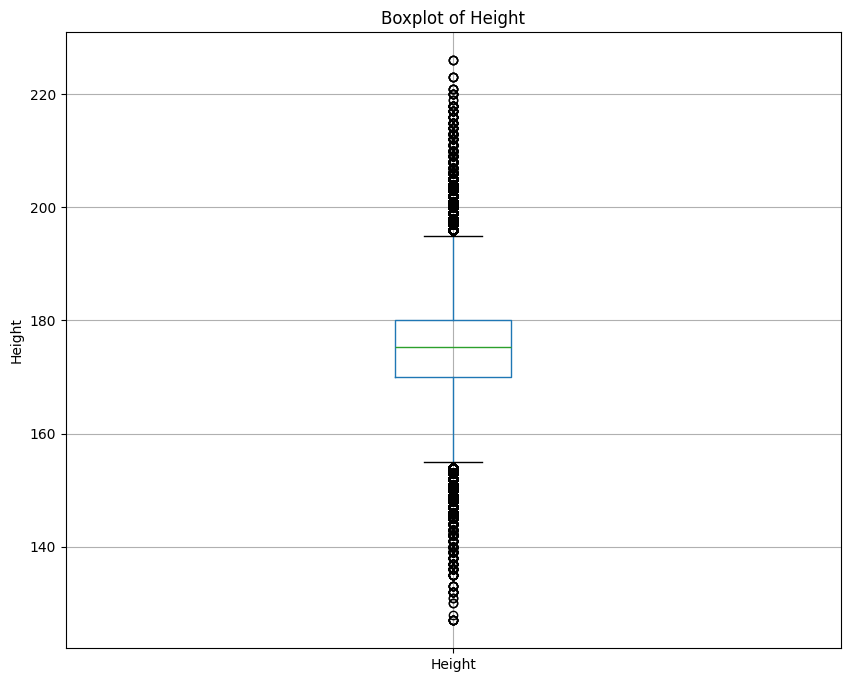

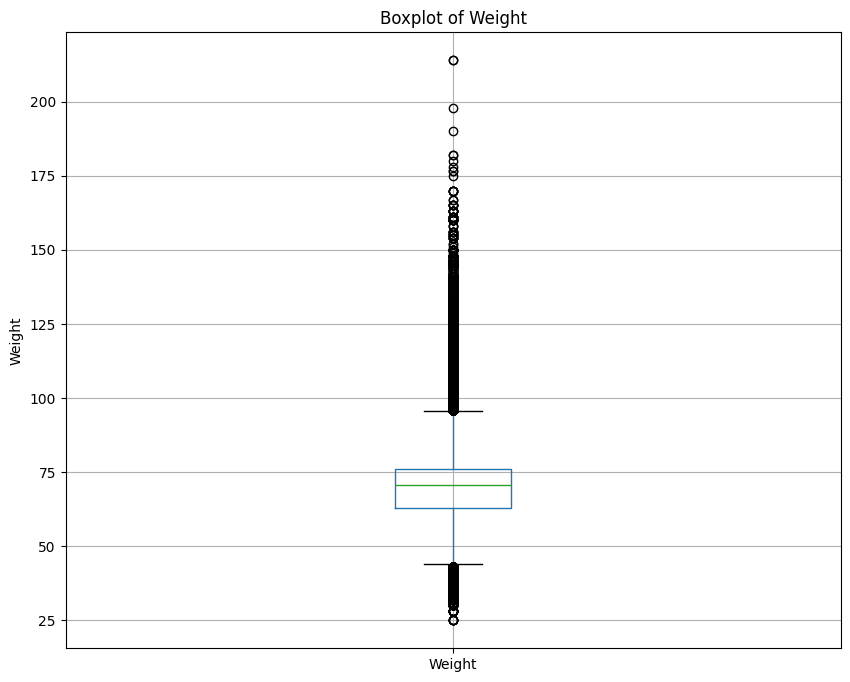

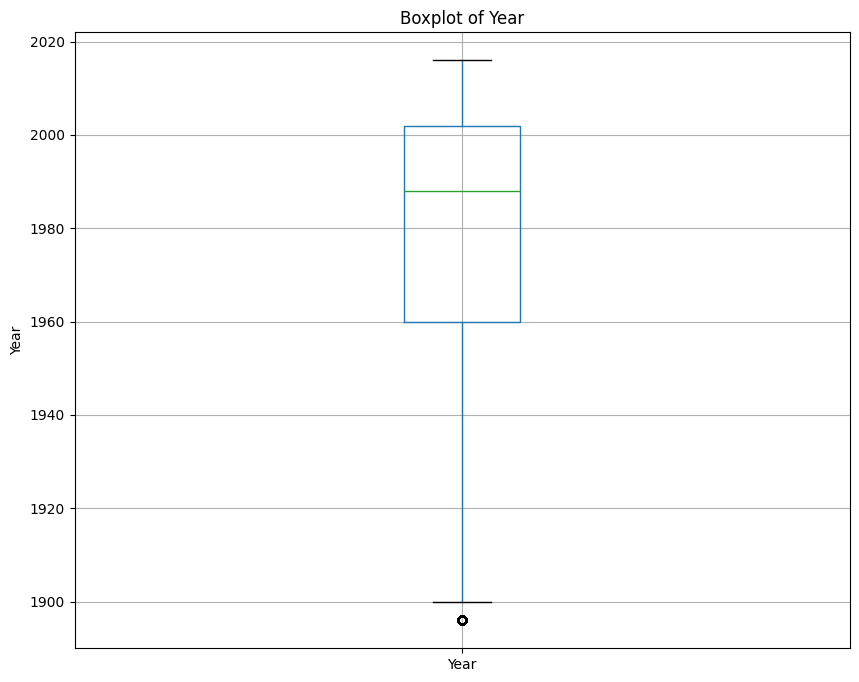

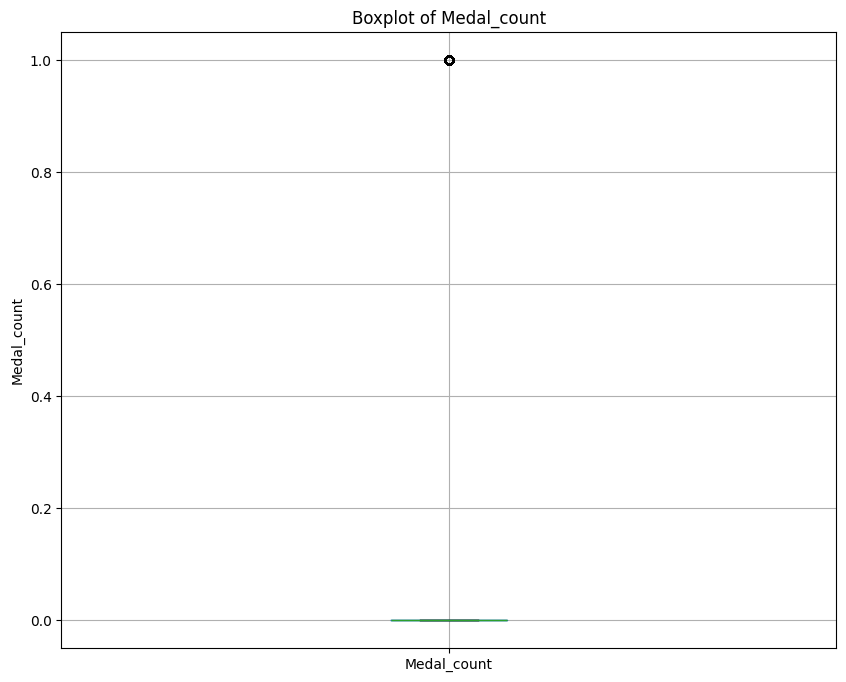

In [38]:
def graficos_boxplot(df):
    
    # Select only numeric columns
    df_numerico = df.select_dtypes('number')
    
    # Iterate over each numeric column
    for columna in df_numerico.columns:
        plt.figure(figsize=(10, 8))
        df.boxplot(column=columna)
        plt.title(f'Boxplot of {columna}')
        plt.ylabel(columna)
        plt.show()
        

graficos_boxplot(df)


## Analysis of Possible Outliers


### Analysis of Age



In [39]:
rango_iqr = stats.iqr(df['Age'])
rango_iqr = stats.iqr(df['Age'])

print(f"The interquartile range is: {rango_iqr}")
print(f'The lower bound is {np.quantile(df["Age"], 0.25) - rango_iqr * 1.5}')
print(f'The upper bound is {np.quantile(df["Age"], 0.75) + rango_iqr * 1.5}')


The interquartile range is: 6.0
The lower bound is 13.0
The upper bound is 37.0


In [18]:
df[df.Age < 13].Age.value_counts()

Age
12.0    39
11.0    13
10.0     1
Name: count, dtype: int64

### Analysis of Height


In [40]:
rango_iqr = stats.iqr(df['Height'])

print(f"The interquartile range is: {rango_iqr}")
print(f'The lower bound is {np.quantile(df["Height"], 0.25) - rango_iqr * 1.5}')
print(f'The upper bound is {np.quantile(df["Height"], 0.75) + rango_iqr * 1.5}')


The interquartile range is: 10.0
The lower bound is 155.0
The upper bound is 195.0


In [20]:
df[df.Height < 155].Height.value_counts()

Height
152.0    839
154.0    697
150.0    685
153.0    679
151.0    236
147.0    210
148.0    206
149.0    187
145.0    164
146.0    155
142.0    121
144.0     99
143.0     77
140.0     60
139.0     48
136.0     28
141.0     25
138.0     20
137.0     18
135.0     14
132.0      9
127.0      7
133.0      6
131.0      2
130.0      2
128.0      1
Name: count, dtype: int64

In [21]:
df[df.Height == 128]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
90772,Helman Palije,M,21.0,128.0,74.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,No Medal


In [41]:
rango_iqr = stats.iqr(df['Weight'])

print(f"The interquartile range is: {rango_iqr}")
print(f'The lower bound is {np.quantile(df["Weight"], 0.25) - rango_iqr * 1.5}')
print(f'The upper bound is {np.quantile(df["Weight"], 0.75) + rango_iqr * 1.5}')


The interquartile range is: 13.0
The lower bound is 43.5
The upper bound is 95.5


In [23]:
df[df.Weight > 93].Weight.value_counts().sort_index(ascending=False)

Weight
214.0       2
198.0       1
190.0       1
182.0       2
180.0       1
         ... 
96.0      859
95.5        2
95.0     1842
94.0      990
93.5        4
Name: count, Length: 108, dtype: int64

In [24]:
df[df.Weight > 93].count()

Name      12593
Sex       12593
Age       12593
Height    12593
Weight    12593
Team      12593
NOC       12593
Games     12593
Year      12593
Season    12593
City      12593
Sport     12593
Event     12593
Medal     12593
dtype: int64

# Insights

## What is the distribution of medals by country?


In [25]:
country_medal = df.groupby(['Team', 'Medal']).size().unstack().fillna(0)
country_medal['total'] = country_medal.sum(axis=1)
country_medal_top20 = country_medal.sort_values(by='total',ascending=False).drop('No Medal', axis=1).head(10)
country_medal_top20


Medal,Bronze,Gold,Silver,total
Team,,,,
United States,1233.0,2474.0,1512.0,17598.0
France,577.0,455.0,518.0,11817.0
Great Britain,572.0,519.0,582.0,11264.0
Italy,484.0,535.0,508.0,10213.0
Germany,678.0,679.0,627.0,9230.0
Canada,408.0,422.0,413.0,9226.0
Japan,357.0,247.0,307.0,8269.0
Sweden,507.0,451.0,476.0,8004.0
Australia,511.0,342.0,453.0,7512.0


             Team   Medal   Count
0   United States    Gold  2474.0
1          France    Gold   455.0
2   Great Britain    Gold   519.0
3           Italy    Gold   535.0
4         Germany    Gold   679.0
5          Canada    Gold   422.0
6           Japan    Gold   247.0
7          Sweden    Gold   451.0
8       Australia    Gold   342.0
9         Hungary    Gold   432.0
10  United States  Silver  1512.0
11         France  Silver   518.0
12  Great Britain  Silver   582.0
13          Italy  Silver   508.0
14        Germany  Silver   627.0
15         Canada  Silver   413.0
16          Japan  Silver   307.0
17         Sweden  Silver   476.0
18      Australia  Silver   453.0
19        Hungary  Silver   330.0
20  United States  Bronze  1233.0
21         France  Bronze   577.0
22  Great Britain  Bronze   572.0
23          Italy  Bronze   484.0
24        Germany  Bronze   678.0
25         Canada  Bronze   408.0
26          Japan  Bronze   357.0
27         Sweden  Bronze   507.0
28      Austra

Text(0.5, 1.0, 'Medals by Team')

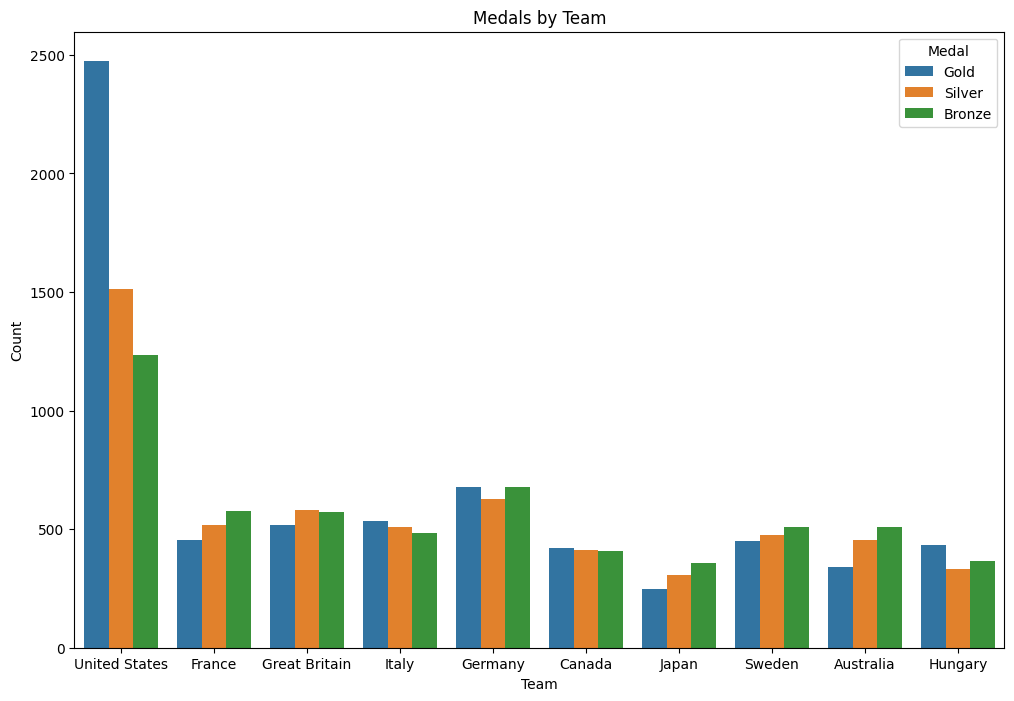

In [43]:
country_medal_reset = country_medal_top20.reset_index()
medals_melted = country_medal_reset.melt(id_vars='Team', value_vars=['Gold', 'Silver', 'Bronze'], var_name='Medal', value_name='Count')

print(medals_melted)

plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Count', hue='Medal', data=medals_melted)
plt.title("Medals by Team")


## How has the participation of women in the Olympic Games evolved over the years?

We create dataframes for men and women and perform data segmentation, as well as the segmentation of Winter and Summer Olympic Games.


Text(0.5, 1.0, 'Female participation')

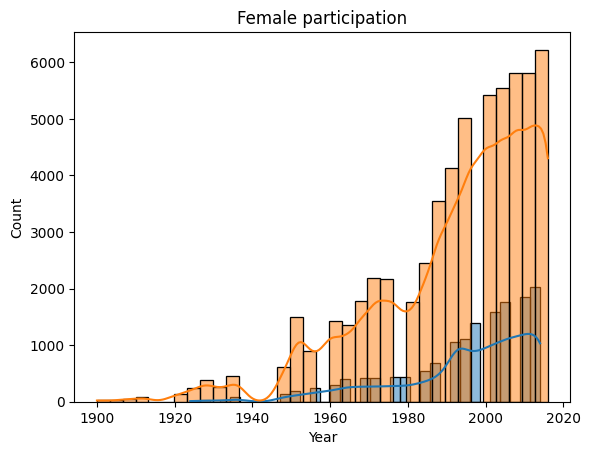

In [44]:
females = df[df.Sex == 'F']
males = df[df.Sex == 'M']

females_winter = females[females.Season == 'Winter']
males_winter = males[males.Season == 'Winter']

females_summer = females[females.Season == 'Summer']
males_summer = males[males.Season == 'Summer']

female_participation_winter = females_winter.groupby('Year').size().reset_index().rename(columns={0: 'count'})
female_participation_summer = females_summer.groupby('Year').size().reset_index().rename(columns={0: 'count'})

sns.histplot(data=females_winter, x='Year', bins=35, kde=True) 
sns.histplot(data=females_summer, x='Year', bins=35, kde=True) 
plt.title('Female participation')

## What is the relationship between height and weight of athletes by their sport?

We show the relationship between height and weight for the 3 most common sports in the Olympics.


### Women

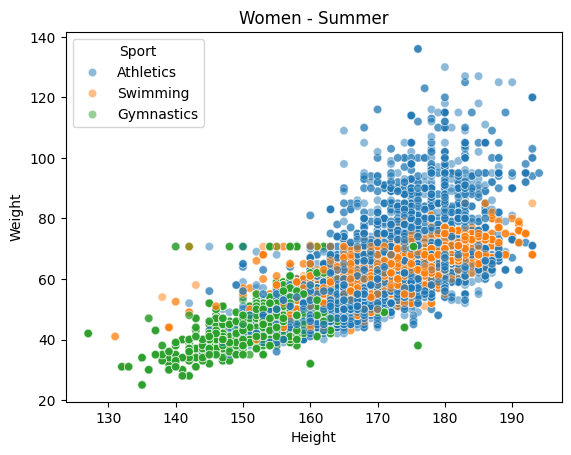

Text(0.5, 1.0, 'Women - Winter')

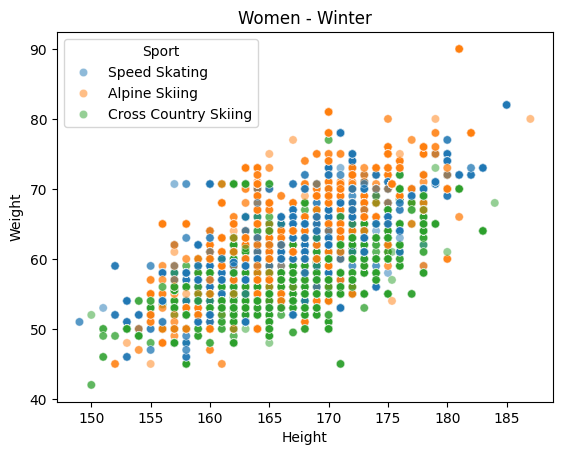

In [45]:
female_summer_sports = females_summer.Sport.value_counts().head(3).index.to_list()
female_winter_sports = females_winter.Sport.value_counts().head(3).index.to_list()

female_summer_top_3_sports_dataframe = females_summer[females_summer.Sport.isin(female_summer_sports)]
female_winter_top_3_sports_dataframe = females_winter[females_winter.Sport.isin(female_winter_sports)]

# Create the visualization
sns.scatterplot(data=female_summer_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Women - Summer')
plt.show()
sns.scatterplot(data=female_winter_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Women - Winter')


### Hombres

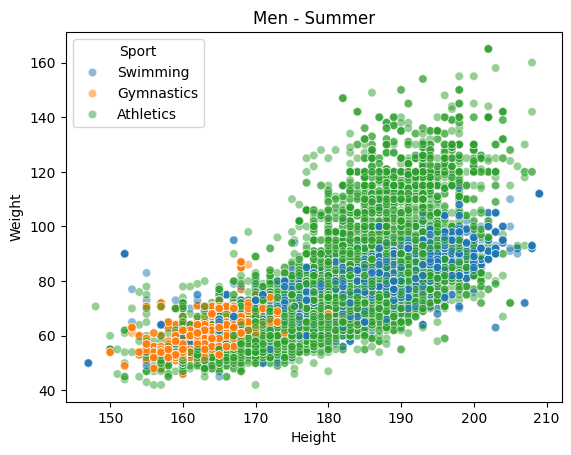

Text(0.5, 1.0, 'Men - Winter')

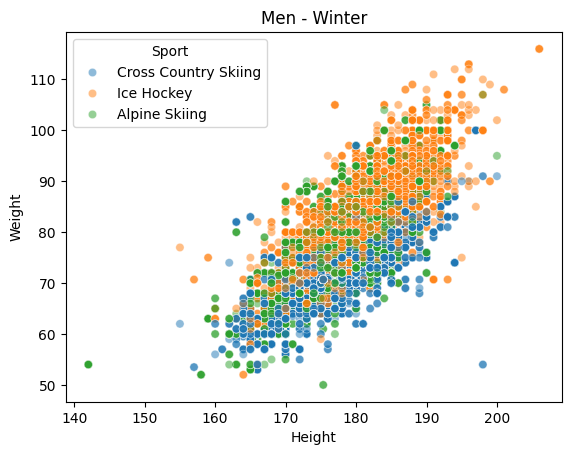

In [47]:
male_summer_sports = males_summer.Sport.value_counts().head(3).index.to_list()
male_winter_sports = males_winter.Sport.value_counts().head(3).index.to_list()

male_summer_top_3_sports_dataframe = males_summer[males_summer.Sport.isin(male_summer_sports)]
male_winter_top_3_sports_dataframe = males_winter[males_winter.Sport.isin(male_winter_sports)]

sns.scatterplot(data=male_summer_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Men - Summer')
plt.show()
sns.scatterplot(data=male_winter_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Men - Winter')


## Variation in the Age of Medalists Across Different Sports and Events, Segmented by Gender and Season

We show the relationship of individuals who have won medals in the 10 sports with the most participants.


Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10827
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: count, dtype: int64


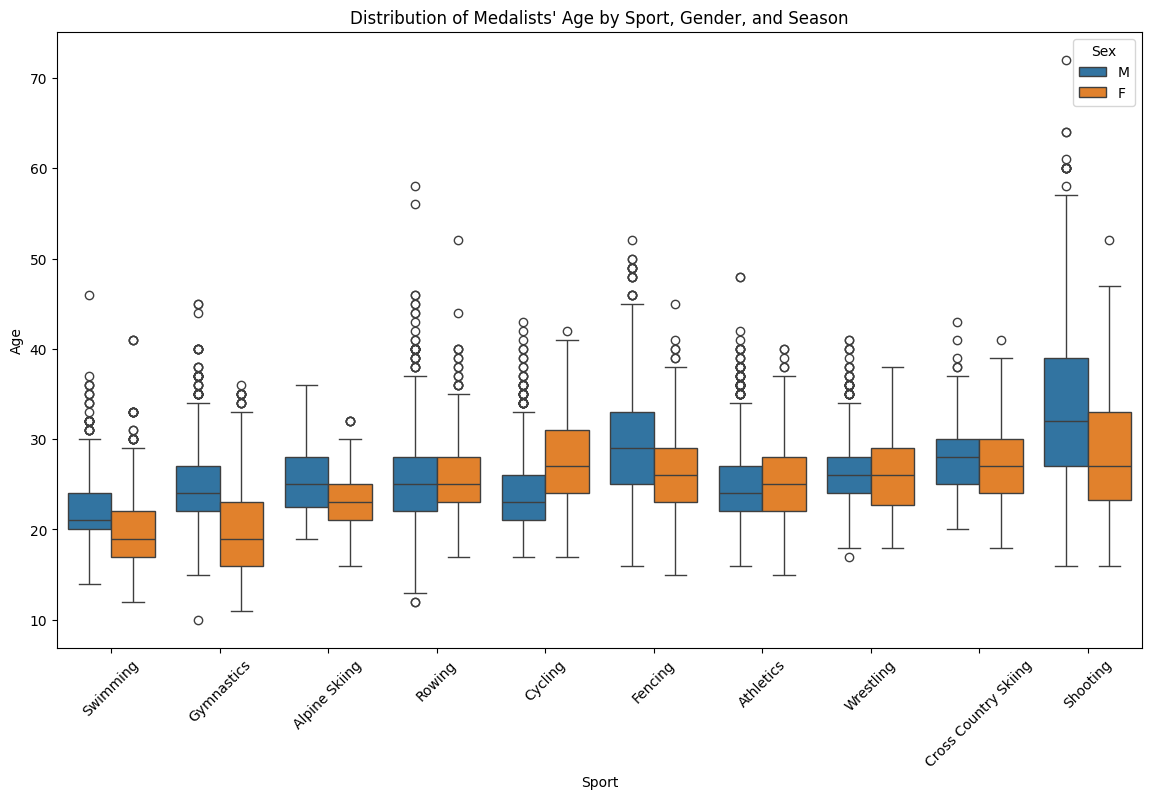

In [48]:
top_ten_sports = df.Sport.value_counts().sort_values(ascending=False).head(10).index.to_list()
print(df.Sport.value_counts().sort_values(ascending=False).head(10))

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[(df.Sport.isin(top_ten_sports)) & (df.Medal != 'No Medal')], x='Sport', y='Age', hue='Sex')
plt.title("Distribution of Medalists' Age by Sport, Gender, and Season")
plt.xlabel("Sport")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


## Emerging Countries in Recent Olympic Games in Terms of Medals Won, Segmented by Season


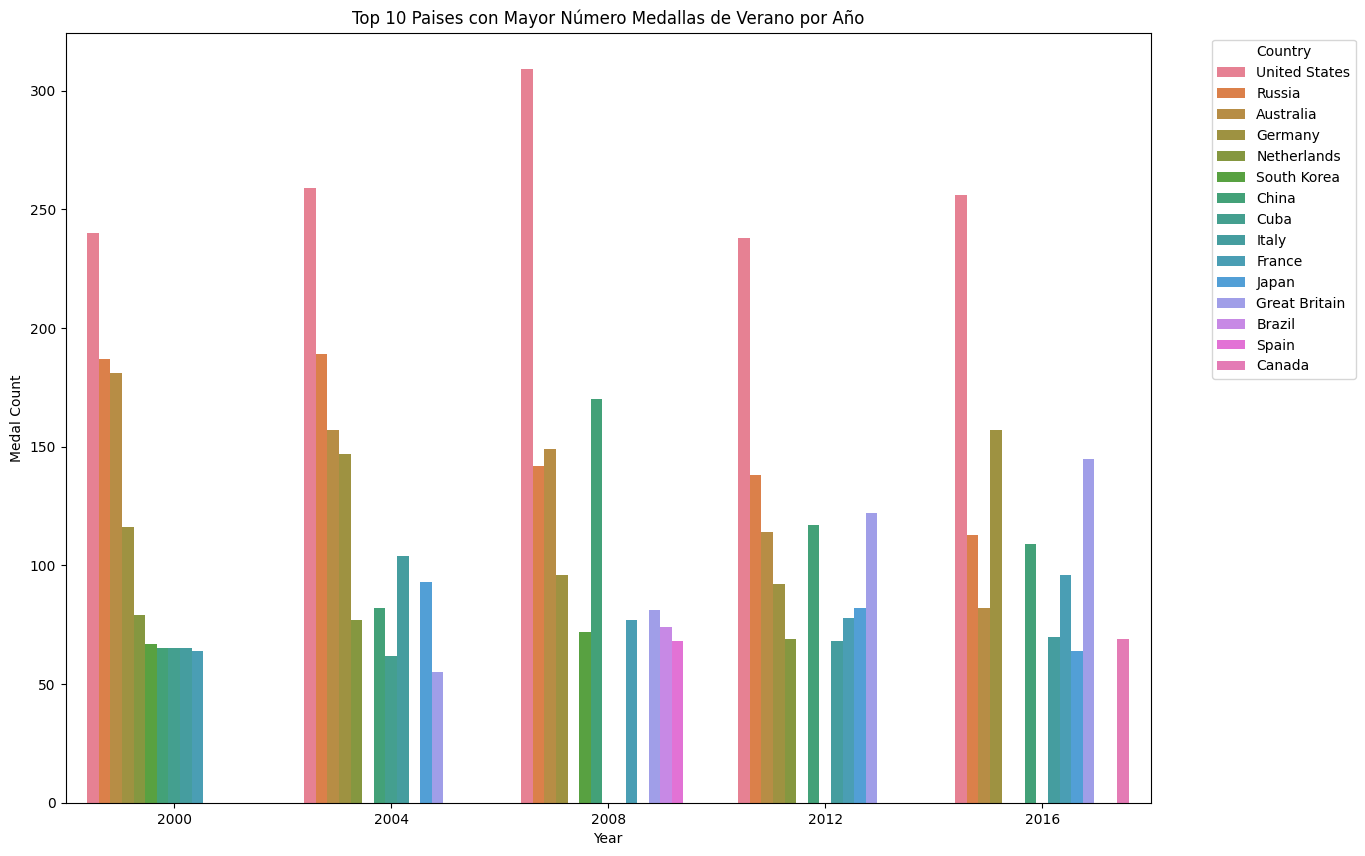

In [31]:
# Filtrar los datos de los últimos Juegos Olímpicos
recent_games_summer = df[(df['Year'] >= 2000) & (df['Medal'] != 'No Medal') & (df['Season'] == 'Summer')]

medals_by_country_recent_summer_season = recent_games_summer.groupby(['Year', 'Team']).size().reset_index(name='Medal Count')
medals_by_country_recent_summer_season = medals_by_country_recent_summer_season.sort_values(by=['Year', 'Medal Count'], ascending=[True, False])

top_10_countries_by_year_summer = medals_by_country_recent_summer_season.groupby('Year').head(10).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(x='Year', y='Medal Count', hue='Team', data=top_10_countries_by_year_summer, dodge=True)
plt.title('Top 10 Paises con Mayor Número Medallas de Verano por Año')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



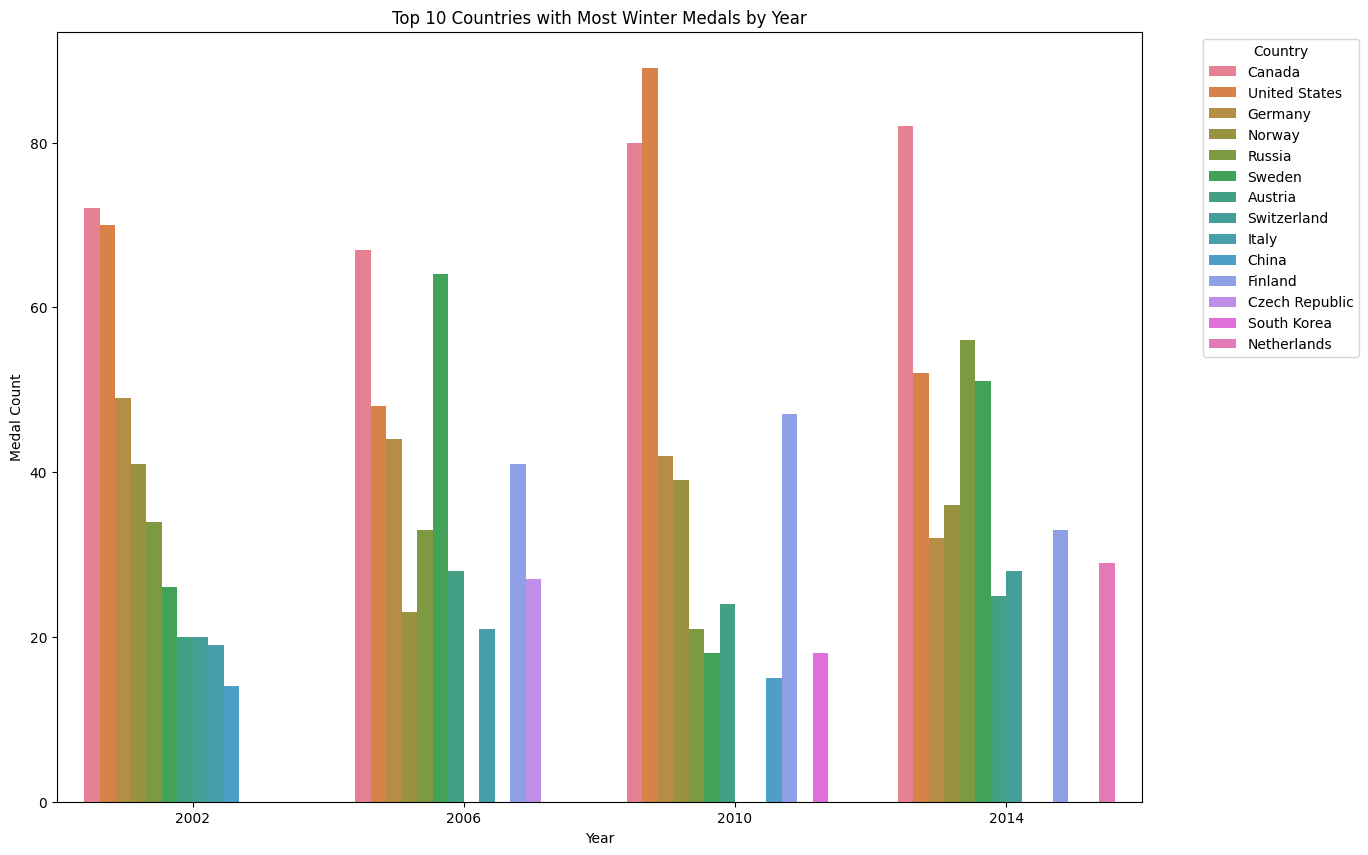

In [49]:
# Filter data from the most recent Olympic Games
recent_games_winter = df[(df['Year'] >= 2000) & (df['Medal'] != 'No Medal') & (df['Season'] == 'Winter')]

medals_by_country_recent_winter_season = recent_games_winter.groupby(['Year', 'Team']).size().reset_index(name='Medal Count')
medals_by_country_recent_winter_season = medals_by_country_recent_winter_season.sort_values(by=['Year', 'Medal Count'], ascending=[True, False])

top_10_countries_by_year_winter = medals_by_country_recent_winter_season.groupby('Year').head(10).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(x='Year', y='Medal Count', hue='Team', data=top_10_countries_by_year_winter, dodge=True)
plt.title('Top 10 Countries with Most Winter Medals by Year')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Success Rate of Athletes Based on the Number of Olympic Games They Have Participated In, Segmented by Gender


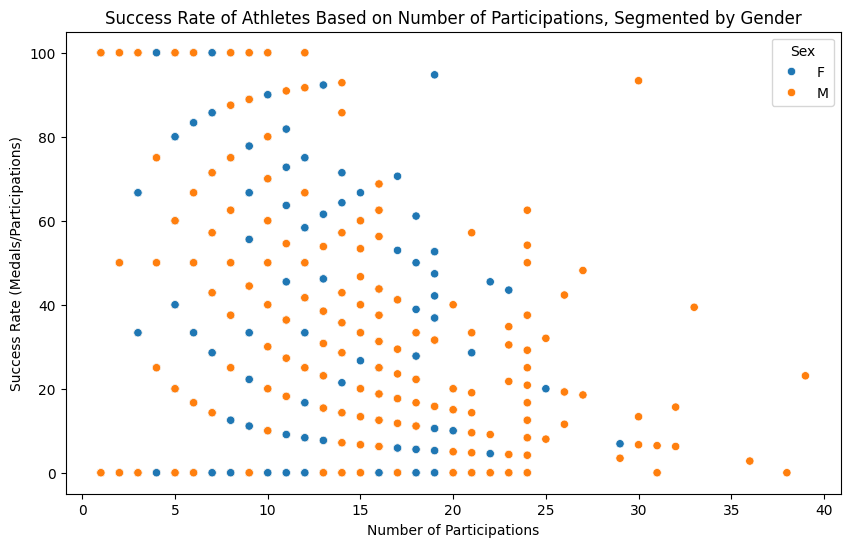

In [50]:
# Filter medal data
df['Medal_count'] = df['Medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

participations_medals_sex = df.groupby(['Name', 'Sex']).agg({
    'Name': 'count',
    'Medal_count': 'sum'
}).rename(columns={'Name': 'Participations', 'Medal_count': 'Medals'}).reset_index()

participations_medals_sex['Success Rate'] = (participations_medals_sex['Medals'] / participations_medals_sex['Participations']) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(data=participations_medals_sex, x='Participations', y='Success Rate', hue='Sex')
plt.title("Success Rate of Athletes Based on Number of Participations, Segmented by Gender")
plt.xlabel("Number of Participations")
plt.ylabel("Success Rate (Medals/Participations)")
plt.show()


## Change in the Distribution of Sports in the Olympic Games Over Time, Segmented by Season



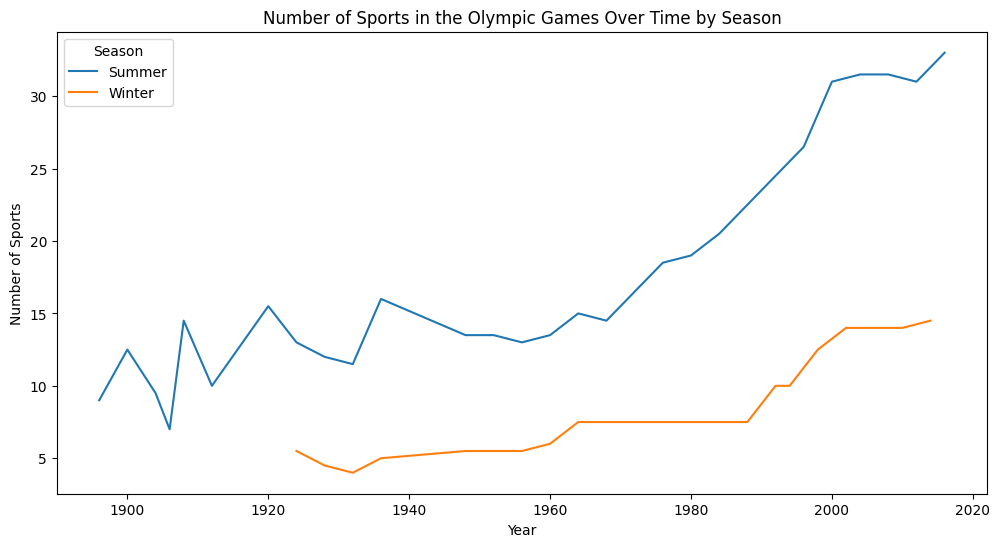

In [51]:
# Count the number of sports by year and season
sports_by_year_season = df.groupby(['Year', 'Sex', 'Season'])['Sport'].nunique().reset_index(name='Unique Sports')

plt.figure(figsize=(12, 6))
sns.lineplot(data=sports_by_year_season, x='Year', y='Unique Sports', errorbar=None, hue='Season')

plt.title("Number of Sports in the Olympic Games Over Time by Season")
plt.xlabel("Year")
plt.ylabel("Number of Sports")
plt.show()




## Significant Differences in the Number of Medals Won Between Male and Female Athletes, Segmented by Season


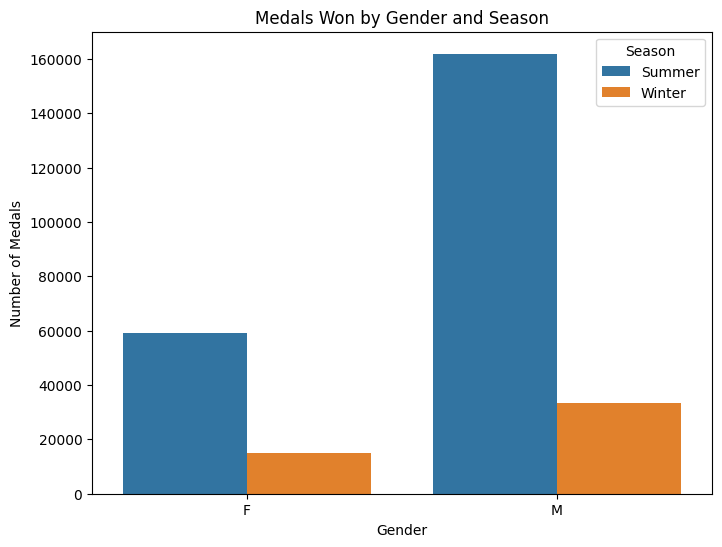

In [52]:
medals_by_sex_season = df.groupby(['Sex', 'Season']).size().reset_index(name='Medal Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=medals_by_sex_season, x='Sex', y='Medal Count', hue='Season')
plt.title("Medals Won by Gender and Season")
plt.xlabel("Gender")
plt.ylabel("Number of Medals")
plt.show()
